# Data-Driven Nutritional Insights using Clustering and Dimensionality Reduction in Food Analysis

## Problem Statement



```
# This is formatted as code
```

This project aims to cluster approximately 8.8k types of food and products based on their nutritional attributes, represented by a dataset with 77 features. To achieve this, the project will employ dimensionality reduction techniques such as Principal Component Analysis (PCA) and EigenValue to condense the dataset's dimensionality while preserving essential nutritional information. Additionally, feature scaling methods will be applied to standardize the features. The ultimate goal is to categorize food items into distinct clusters according to their nutritional profiles, providing valuable insights for dietary analysis and nutritional research.




### Objective
Build a clustering model

### Expected output details:
- Clustering based model


## Input data details

Nutrition.xlsv dataset comes with 76 attributes


Features:
name, serving_size, calories, total_fat, saturated_fat, cholesterol, sodium, choline, folate, folic_acid, niacin, pantothenic_aci, riboflavi, thiami, vitamin_, vitamin_a_ra, carotene_alph, carotene_bet, cryptoxanthin_bet, lutein_zeaxanthi, lucopen, vitamin_b1, vitamin_b, vitamin_, vitamin_, vitamin_, tocopherol_alph, vitamin_, calciu, coppe, iro, magnesiu, manganes, phosphorou, potassiu, seleniu, zin, protei, alanin, arginin, aspartic_aci, cystin, glutamic_aci, glycin, histidin, hydroxyprolin, isoleucin, leucin, lysin, methionin, phenylalanin, prolin, serin, threonin, tryptopha, tyrosin, valin, carbohydrat, fibe, sugar, fructos, galactos, glucos, lactos, maltos, sucros, fa, saturated_fatty_acid, monounsaturated_fatty_acid, polyunsaturated_fatty_acid, fatty_acids_total_tran, alcoho, as, caffein, theobromin, water
   

## Case study approach:

#### Step 1: Universal Library and Package declaration

#### Step 2: Import data to python

#### Step 3: Clean, prepare and validate data

#### Step 4: Inferential Statistics

#### Step 5: Exploratory Data Analysis

#### Step 6: Data Preprocessing for Model Implementation

#### Step 7: Implementing PCA and t-sne

#### Step 8: Model Design Tuning and Testing

#### Step 9: Cluster Profiling

#### Step 10: Conclusion

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### Optional

- Hierarchical Clustering

- PCA

- Hierarchical Clustering on PCA transformed data

- Conclusion and Interpretation

## Step 1: Universal Library and Package declaration

In [ ]:
import warnings
warnings.filterwarnings("ignore") # used to supress display of warnings
import pandas as pd   # used for data manipulation and analysis
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt   #for data visualization
from matplotlib import pyplot
import seaborn as sns  ## Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
%matplotlib inline
import numpy as np  #for array manipulation in Python
from scipy.stats import norm #A normal continuous random variable
from sklearn.preprocessing import *
import scipy.stats as stats
from sklearn.cluster import KMeans   #k-means algorithm
from sklearn.metrics import silhouette_score  #t calculate the silhouette score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time

## Step 2: Import data to python

In [ ]:
df = pd.read_excel("/content/nutrition.xlsx")
df.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [ ]:
print("The dataframe has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataframe has 8789 rows and 77 columns


In [ ]:
df.columns

Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   serving_size                 8789 non-null   object
 3   calories                     8789 non-null   int64 
 4   total_fat                    8789 non-null   object
 5   saturated_fat                7199 non-null   object
 6   cholesterol                  8789 non-null   object
 7   sodium                       8789 non-null   object
 8   choline                      8789 non-null   object
 9   folate                       8789 non-null   object
 10  folic_acid                   8789 non-null   object
 11  niacin                       8789 non-null   object
 12  pantothenic_acid             8789 non-null   object
 13  riboflavin                   8789

There are 8789 samples and 76 columns.

FoodID and FoodName are object columns  

There are many missing values present in saturated_fat etc

In [ ]:
print("The dataframe has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataframe has 8789 rows and 77 columns


ACCEPT ONLY NUMERICAL VALUES FROM THE DATASET

In [ ]:
columns_with_units = [
    'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatty_acids', 'monounsaturated_fatty_acids',
       'polyunsaturated_fatty_acids', 'fatty_acids_total_trans', 'alcohol',
       'ash', 'caffeine', 'theobromine', 'water'
]


In [ ]:
for column in columns_with_units:
    # Check if the column contains string values
    if df[column].dtype == 'object':
        # Use regular expressions to extract numerical values and convert them to float
        df[column] = df[column].str.extract('(\d+\.\d+|\d+)').astype(float)


In [ ]:
df = df.fillna(0)

In [ ]:
df

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100.000,381,0.100,0.000,0.000,9.000,0.400,0.000,...,0.050,0.009,0.016,0.025,0.000,0.000,0.090,0.000,0.000,8.320
1,1,"Nuts, pecans",100.000,691,72.000,6.200,0.000,0.000,40.500,22.000,...,71.970,6.180,40.801,21.614,0.000,0.000,1.490,0.000,0.000,3.520
2,2,"Eggplant, raw",100.000,25,0.200,0.000,0.000,2.000,6.900,22.000,...,0.180,0.034,0.016,0.076,0.000,0.000,0.660,0.000,0.000,92.300
3,3,"Teff, uncooked",100.000,367,2.400,0.400,0.000,12.000,13.100,0.000,...,2.380,0.449,0.589,1.071,0.000,0.000,2.370,0.000,0.000,8.820
4,4,"Sherbet, orange",100.000,144,2.000,1.200,1.000,46.000,7.700,4.000,...,2.000,1.160,0.530,0.080,1.000,0.000,0.400,0.000,0.000,66.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100.000,125,3.500,1.400,62.000,54.000,64.500,4.000,...,3.500,1.353,1.554,0.244,62.000,0.000,1.110,0.000,0.000,72.510
8785,8785,"Lamb, cooked, separable lean only, composite o...",100.000,206,8.900,3.900,109.000,50.000,0.000,0.000,...,8.860,3.860,3.480,0.520,109.000,0.000,1.600,0.000,0.000,59.950
8786,8786,"Lamb, raw, separable lean and fat, composite o...",100.000,277,23.000,12.000,78.000,39.000,0.000,1.000,...,22.740,11.570,8.720,0.980,78.000,0.000,0.920,0.000,0.000,59.800
8787,8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100.000,121,3.000,1.100,60.000,53.000,64.200,4.000,...,3.040,1.086,1.266,0.233,60.000,0.000,1.100,0.000,0.000,73.430


## Step 3: Clean, prepare and validate data

In [ ]:
missing = (df.isnull()).sum()  #finds total number of missing values in each column
missing = missing[missing>0]  #filter out the count of missing values>0
print(missing)

Series([], dtype: int64)


<BarContainer object of 0 artists>

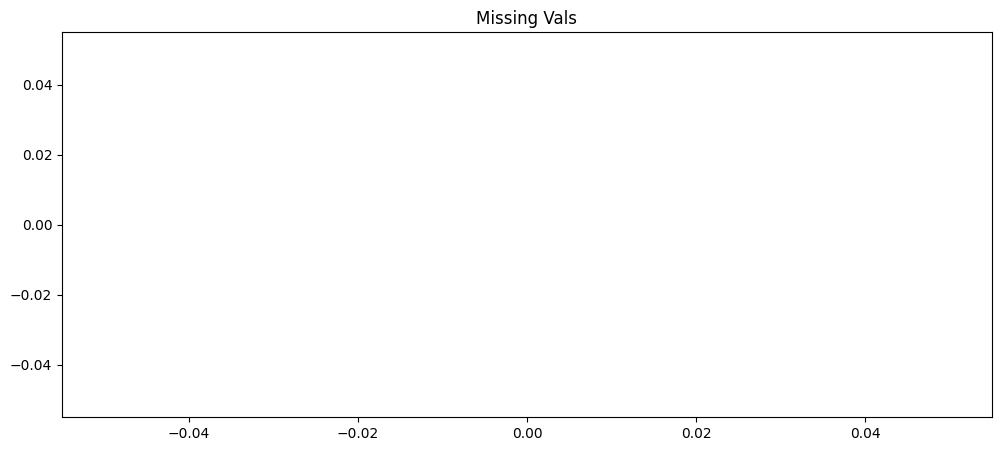

In [ ]:
#visualize missing data

plt.figure(figsize=(12, 5))
plt.title('Missing Vals')
plt.bar(missing,missing.count())

In [ ]:
df.describe()

,Unnamed: 0,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
count,8789.000,8789.000,8789.000,8789.000,8789.000,8789.000,8789.000,8789.000,8789.000,8789.000,...,8789.000,8789.000,8789.000,8789.000,8789.000,8789.000,8789.000,8789.000,8789.000,8789.000
mean,4394.000,100.000,226.284,10.557,3.434,38.723,306.354,23.681,44.086,17.639,...,10.551,3.434,3.772,2.114,38.723,0.118,1.717,2.609,4.696,54.112
std,2537.310,0.000,169.862,15.818,6.430,117.359,939.220,51.332,127.670,100.736,...,15.815,6.427,6.826,5.050,117.359,1.600,2.968,82.070,60.963,30.773
min,0.000,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2197.000,100.000,91.000,1.000,0.100,0.000,36.000,0.000,2.000,0.000,...,0.950,0.149,0.074,0.134,0.000,0.000,0.770,0.000,0.000,29.700
50%,4394.000,100.000,191.000,5.100,1.400,2.000,84.000,1.600,9.000,0.000,...,5.130,1.435,1.600,0.591,2.000,0.000,1.170,0.000,0.000,63.080
75%,6591.000,100.000,337.000,14.000,4.200,65.000,396.000,29.400,35.000,0.000,...,13.720,4.174,4.760,1.880,65.000,0.000,2.020,0.000,0.000,77.960
max,8788.000,100.000,902.000,100.000,96.000,3100.000,38758.000,2403.300,3786.000,2993.000,...,100.000,95.600,83.689,74.623,3100.000,42.500,99.800,5714.000,2634.000,100.000


The min value of fat is 0. These data points should be treated as noisy data

For some properties, Calories is 0. These values needs to be checked.

In [ ]:
#check if any duplicate item_id is present or not.
name= df['name'].value_counts()
name = name[name	>1]  #filter out any duplicate values
print(name)

Series([], Name: name, dtype: int64)


There is no duplicate data present

In [ ]:
#Analysis of each column with the help of plots

Text(0.5, 1.0, 'Box Plot')

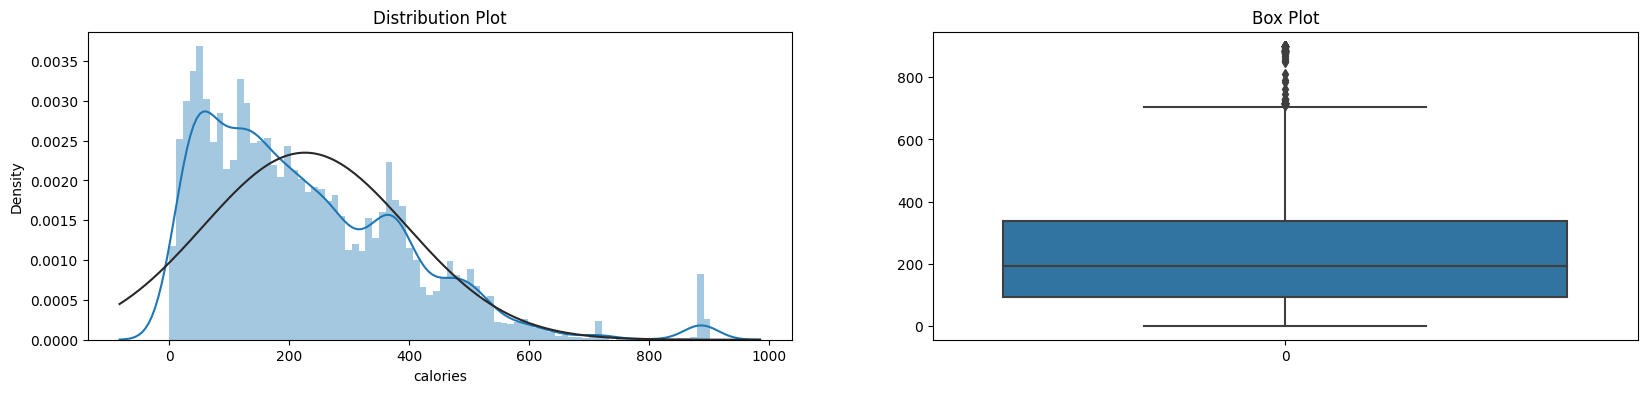

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['calories'],ax=ax1, bins=80, hist=True,fit=norm)
ax1.set_title("Distribution Plot")
sns.boxplot(df['calories'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in Calories column and there is left skewness because long tail is at the right side

Text(0.5, 1.0, 'Box Plot')

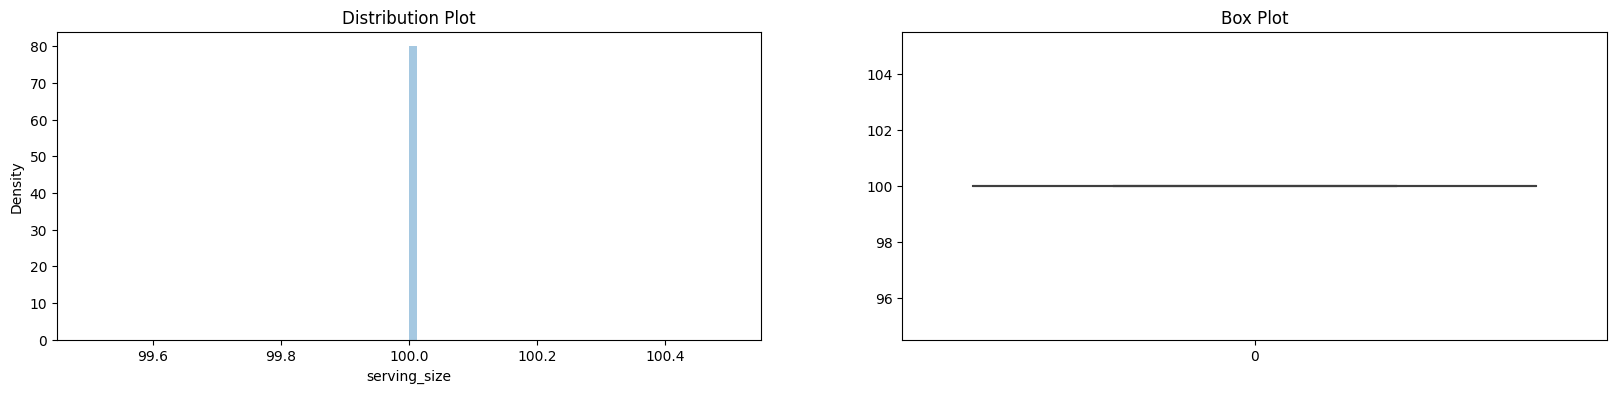

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['serving_size'],ax=ax1, bins=80, hist=True,fit=norm)
ax1.set_title("Distribution Plot")
sns.boxplot(df['serving_size'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in serving_size column and there is no skewness because no long tail is at the left or right side

Text(0.5, 1.0, 'Box Plot')

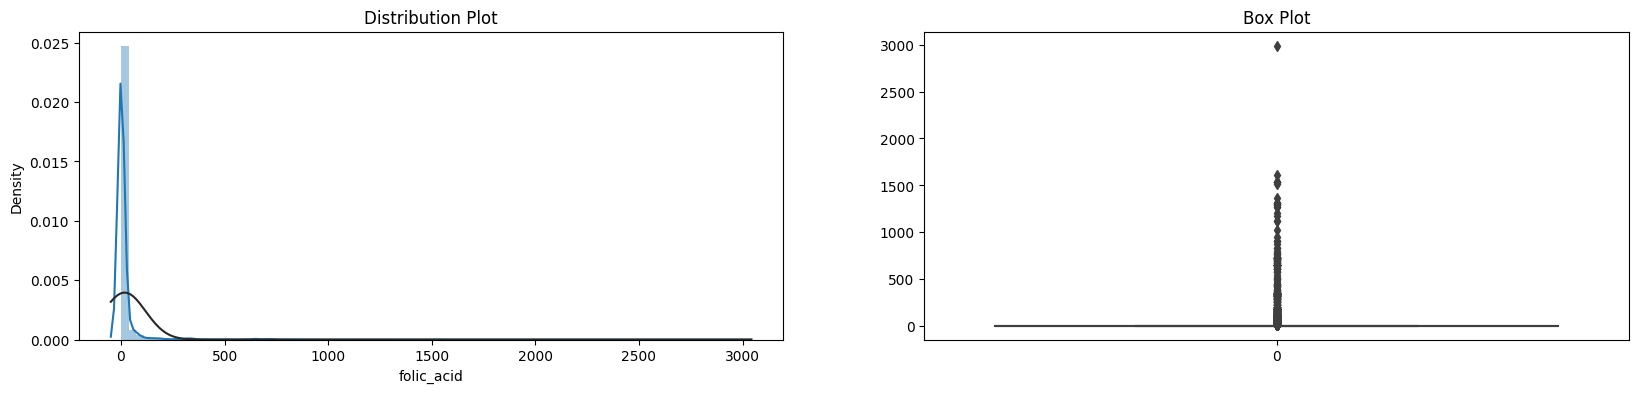

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['folic_acid'],ax=ax1, bins=80, hist=True,fit=norm)
ax1.set_title("Distribution Plot")

sns.boxplot(df['folic_acid'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in folic_acid column and there is right skewness because long tail is at the right side

Text(0.5, 1.0, 'Box Plot')

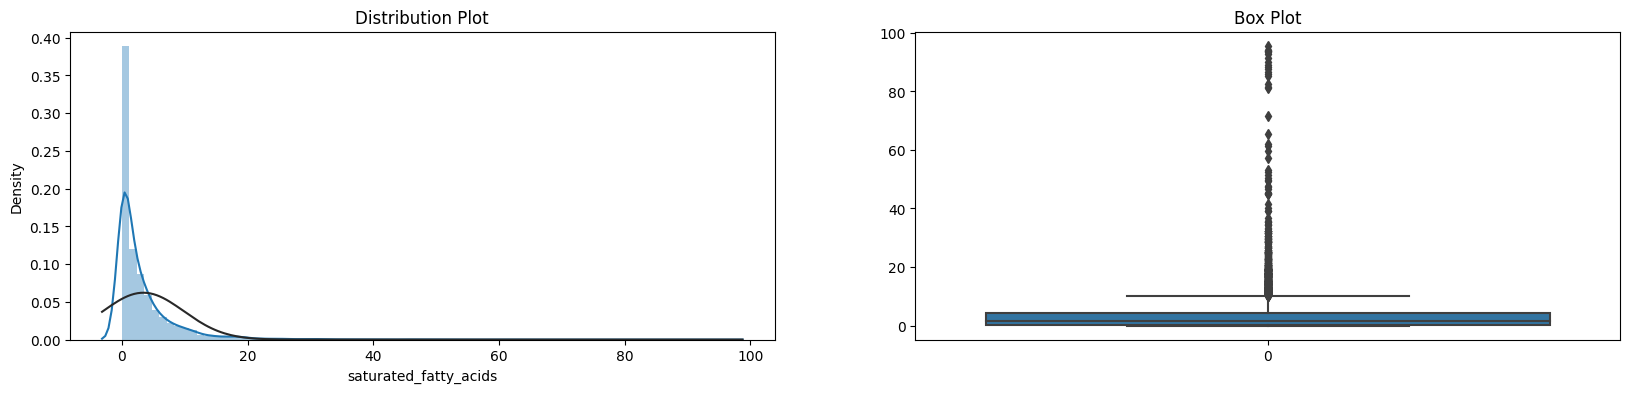

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['saturated_fatty_acids'],ax=ax1, bins=80, hist=True,fit=norm)
ax1.set_title("Distribution Plot")

sns.boxplot(df['saturated_fatty_acids'],ax=ax2)
ax2.set_title("Box Plot")


From above we can see that there are outliers in Totalfat(g) column and there is right skewness because long tail is at the right side

In [ ]:
#replace missing vaues with mean
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   684 non-null    int64  
 1   name                         684 non-null    object 
 2   serving_size                 684 non-null    float64
 3   calories                     684 non-null    int64  
 4   total_fat                    684 non-null    float64
 5   saturated_fat                684 non-null    float64
 6   cholesterol                  684 non-null    float64
 7   sodium                       684 non-null    float64
 8   choline                      684 non-null    float64
 9   folate                       684 non-null    float64
 10  folic_acid                   684 non-null    float64
 11  niacin                       684 non-null    float64
 12  pantothenic_acid             684 non-null    float64
 13  riboflavin          

All the missing values have been replace with mean now.



In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   684 non-null    int64  
 1   name                         684 non-null    object 
 2   serving_size                 684 non-null    float64
 3   calories                     684 non-null    int64  
 4   total_fat                    684 non-null    float64
 5   saturated_fat                684 non-null    float64
 6   cholesterol                  684 non-null    float64
 7   sodium                       684 non-null    float64
 8   choline                      684 non-null    float64
 9   folate                       684 non-null    float64
 10  folic_acid                   684 non-null    float64
 11  niacin                       684 non-null    float64
 12  pantothenic_acid             684 non-null    float64
 13  riboflavin          

No missing values now.

In [ ]:
df.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,7,"Lamb, raw, ground",100.000,282,23.000,10.000,73.000,59.000,69.300,18.000,...,23.410,10.190,9.600,1.850,73.000,0.000,0.870,0.000,0.000,59.470
1,8,"Cheese, camembert",100.000,300,24.000,15.000,72.000,842.000,15.400,62.000,...,24.260,15.259,7.023,0.724,72.000,0.000,3.680,0.000,0.000,51.800
2,67,"Oil, soybean lecithin",100.000,763,100.000,15.000,0.000,0.000,350.000,0.000,...,100.000,15.005,10.977,45.318,0.000,0.000,0.000,0.000,0.000,0.000
3,81,"Cream, cultured, sour",100.000,198,19.000,10.000,59.000,31.000,19.200,6.000,...,19.350,10.140,4.594,0.800,59.000,0.000,0.510,0.000,0.000,73.070
4,84,"Cheese, port de salut",100.000,352,28.000,17.000,123.000,534.000,15.400,18.000,...,28.200,16.691,9.338,0.729,123.000,0.000,2.000,0.000,0.000,45.450


<Axes: >

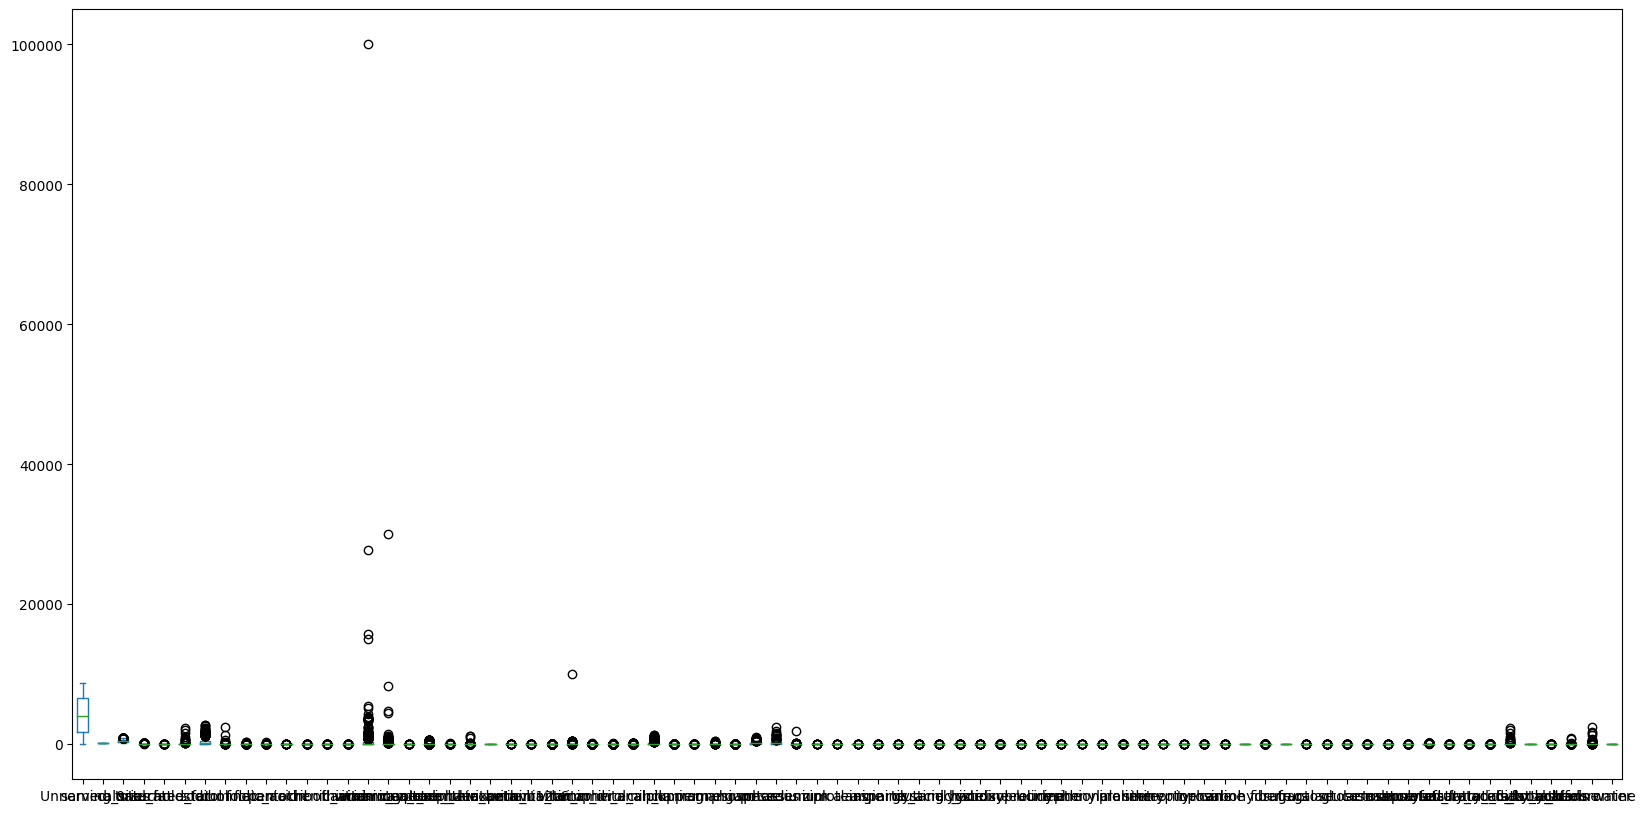

In [ ]:
#Boxplot to understand spread and outliers
df.plot(kind='box', figsize=(20,10))

In [ ]:
#check how many outliers are there in calories column
q1 = np.quantile(df['calories'],0.25)
q2 = np.quantile(df['calories'],0.50)
q3 = np.quantile(df['calories'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("calories above",df['calories'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in calories column are",df[df['calories']>276]['calories'].shape[0])

Quartie1:: 360.75
Quartie2:: 487.5
Quartie3:: 546.0
calories above 823.875 are outliers
The Outliers in calories column are 658


In [ ]:
#check how many outliers are there in folate column
q1 = np.quantile(df['folate'],0.25)
q2 = np.quantile(df['folate'],0.50)
q3 = np.quantile(df['folate'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("folate above",df['folate'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in folate column are",df[df['folate']>1]['folate'].shape[0])

Quartie1:: 0.0
Quartie2:: 6.0
Quartie3:: 25.0
folate above 62.5 are outliers
The Outliers in folate column are 457


In [ ]:
#check how many outliers are there in alcohol column
q1 = np.quantile(df['alcohol'],0.25)
q2 = np.quantile(df['alcohol'],0.50)
q3 = np.quantile(df['alcohol'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("alcohol above",df['alcohol'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in alcohol column are",df[df['alcohol']>276]['alcohol'].shape[0])

Quartie1:: 0.0
Quartie2:: 0.0
Quartie3:: 0.0
alcohol above 0.0 are outliers
The Outliers in alcohol column are 0


In [ ]:
#check how many outliers are there in caffeine column
q1 = np.quantile(df['caffeine'],0.25)
q2 = np.quantile(df['caffeine'],0.50)
q3 = np.quantile(df['caffeine'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("caffeine above",df['caffeine'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in caffeine column are",df[df['caffeine']>275]['caffeine'].shape[0])

Quartie1:: 0.0
Quartie2:: 0.0
Quartie3:: 0.0
caffeine above 0.0 are outliers
The Outliers in caffeine column are 2


Inferences based on outlier detection:

1. All properties with folate greater than 20.1999999999996 are considered outliers in this analysis.
But, it is possible that there could be no such item with such a high sugar content.
2. This analysis treats all those properties whose alcohal is greater than 0.435 as outliers.
But, it is possible that there could be no such item with such a high Alpha-linolenic acid content.
3. This analysis treats all those properties whose caffeine above 2259.75 are outliers
But, it is possible that there could be some items with larger content.
We have treated all these outliers by replacing them with their median value. But, a thorough analysis is also required without treating these outliers.

In [ ]:
#Replacing all the outliers by median
numerics = ['int64', 'float64']
dataset = df.select_dtypes(include=numerics)
for col_name in dataset.columns[:-1]:
    q1 = dataset[col_name].quantile(0.25)
    q3 = dataset[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    dataset.loc[(dataset[col_name] < low) | (dataset[col_name] > high), col_name] = dataset[col_name].median()
df_str = df.select_dtypes(include='object')
df = pd.concat([df_str, dataset], axis=1, join='inner')

<Axes: >

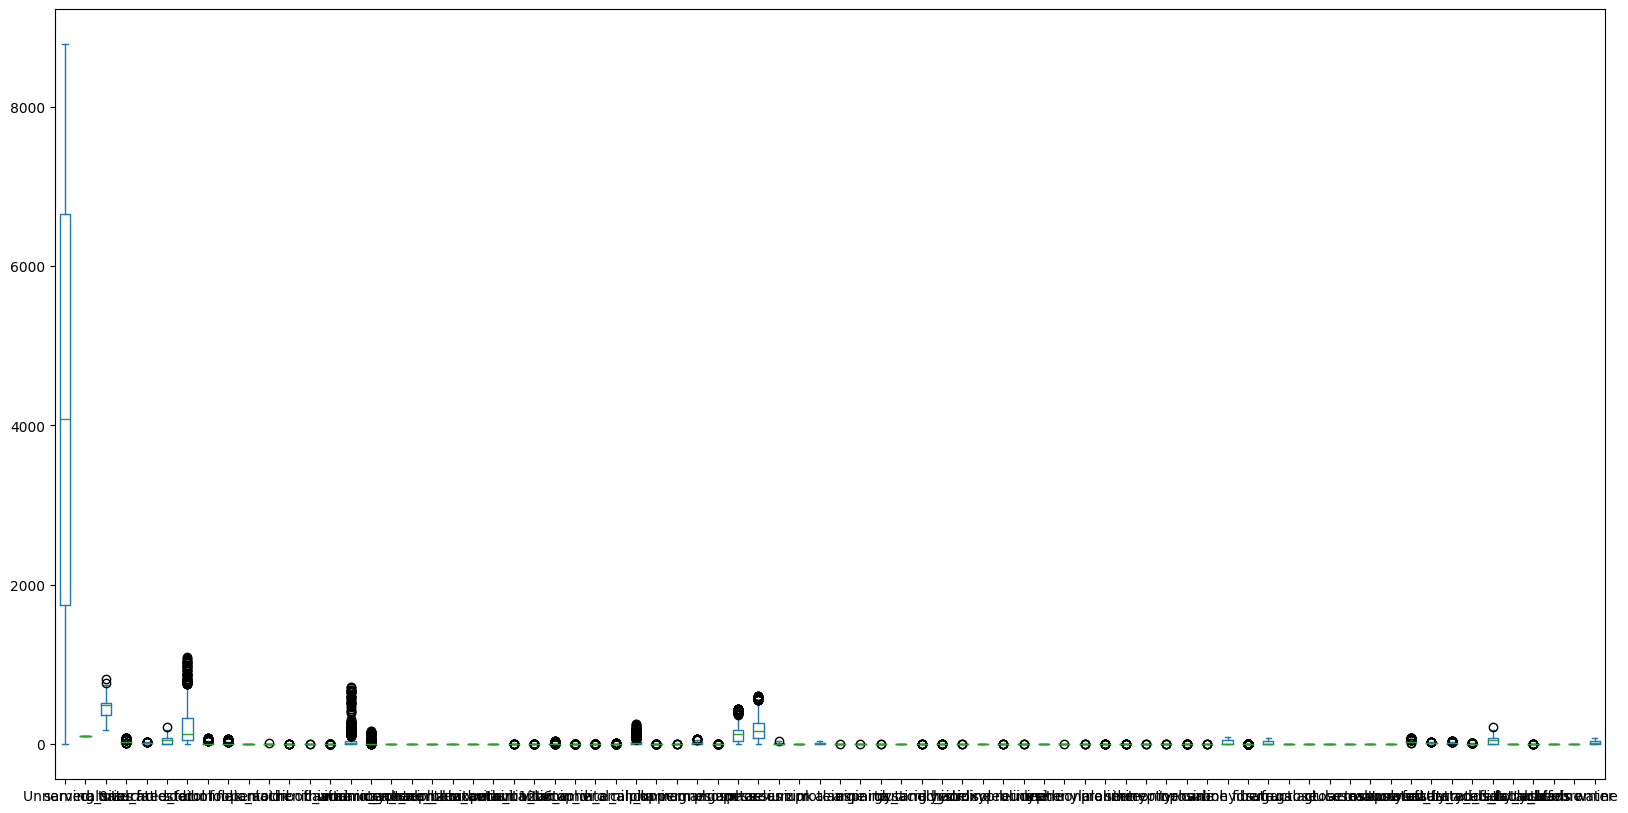

In [ ]:
df.plot(kind='box', figsize=(20,10))

All the outliers have been handled now.

## Step 4: Inferential Statistics

In [ ]:
'''Paired T-test..
we compare the mean of total_fat and alcohol to see if they are statistically significantly different from each other or not.
Here our null hypothesis is that both total_fat and alcohol are significantly similar.'''
total_fat = df['total_fat']
alcohol = df['alcohol']
stats.ttest_rel(a = total_fat, b= alcohol)

TtestResult(statistic=58.96395917563529, pvalue=3.686875207658189e-270, df=683)

P value 0.000 means the null hypothesis is true. It means the null hypothesis is rejected i.e. total_fat and alcohol are significantly different from each other.

Chi-Square is used to test the level of association between two categorical variables.
Here, As a part of future analysis, Chi-Square test can be additionaly used to check the assosication between has_storage_area and has_elevator columns.

## Step 6: Data Preprocessing for Model Implementation

### 6.1 Standardize the dataset

Here, the data set contains numerical features that have been measured in different units, such as deposit and unit_area. The Clustering algorithm would consider deposit more important than unit_area only because the values for deposit are larger as compared to unit_area.

Clustering algorithm need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

Here, we use the StandardScaler class. This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1.

**Start**

In [ ]:
df.head()

NameError: ignored

In [ ]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)


In [ ]:
df_orig = df.copy()
category = ['calories', 'water', 'alcohol']
for c in category:
    le = LabelEncoder()
    df[c] =le.fit_transform(df[c].astype('str'))
features = [c for c in df.columns if c not in ['Unnamed: 0']]
del df['name']
rb = StandardScaler()
df = rb.fit_transform(df)
df = pd.DataFrame(df, columns=features)
df.head()

In [ ]:
df.describe()

# Step 7:Implementing PCA and t-sne

In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
t0 = time.time()
pca = PCA(n_components=3)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))
print(PCA_ds.describe().T)

PCA took 0.047 s
       count   mean   std    min    25%    50%   75%    max
col1 684.000 -0.000 4.676 -5.142 -4.099 -1.822 4.100 11.419
col2 684.000 -0.000 2.459 -5.565 -1.837  0.113 1.610  6.142
col3 684.000 -0.000 1.821 -3.671 -1.321 -0.329 1.044  5.813


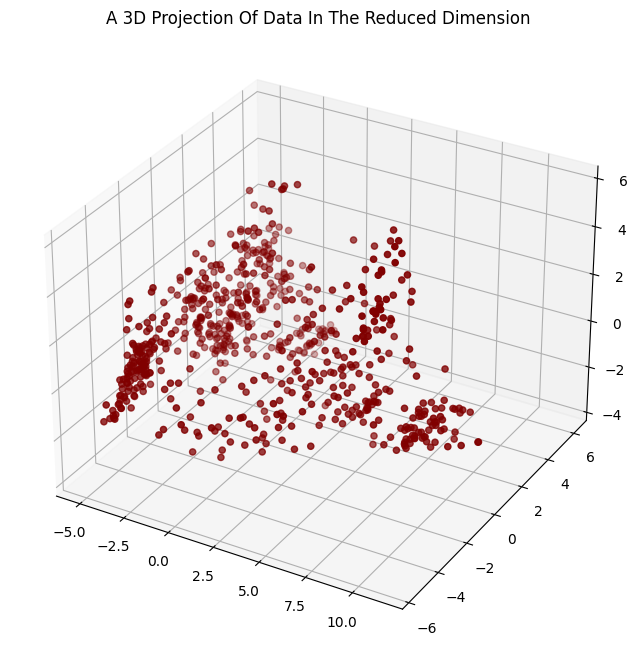

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [ ]:
# T-SNE Implementation

t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(df.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))


T-SNE took 6.1 s


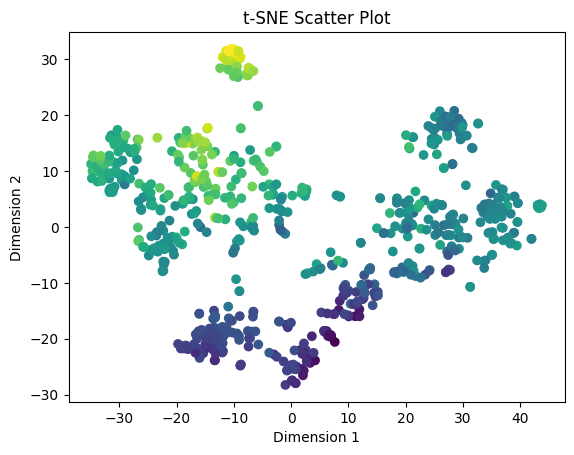

In [ ]:
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap='viridis')

plt.title("t-SNE Scatter Plot")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# Step 8: Model Design Tuning and Testing

### 8.1 Apply K-means on the scaled data. Try it with multiple K values ( K = 1 to 15) and plot a elbow plot between inertia and K value.

Now the data are ready to be clustered. The KMeans estimator class in scikit-learn is where you set the algorithm parameters before fitting the estimator to the data. The scikit-learn implementation is flexible, providing several parameters that can be tuned.

In [ ]:
from sklearn.cluster import KMeans
#This will perform ten runs of the k-means algorithm on your data with a maximum of 300 iterations per run
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300)
kmeans.fit(df)

KMeans(init='random', n_clusters=3, n_init=10)

Here,
init controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random".

n_clusters sets k for the clustering step. This is the most important parameter for k-means.

n_init sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

max_iter sets the number of maximum iterations for each initialization of the k-means algorithm.

In [ ]:
# The lowest SSE value
kmeans.inertia_

24752.064786893832

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-6.96106052e-02,  0.00000000e+00,  7.74521783e-01,
         1.00668385e+00,  5.99434615e-01, -1.99017366e-01,
        -2.18083945e-01, -3.29760019e-01, -6.01606843e-01,
         0.00000000e+00, -6.93763901e-01, -6.04237616e-01,
        -9.88197974e-01, -6.16546853e-01, -2.59414976e-01,
        -1.76270307e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.44873149e-01, -6.90645425e-01,  2.84548248e-01,
        -2.29306366e-01,  1.68241466e-01,  1.68241466e-01,
        -2.37097536e-01, -4.83640255e-01, -6.84715567e-01,
        -9.73718332e-01, -1.01411278e+00, -4.96329456e-01,
        -9.58549955e-01, -9.64026796e-01, -7.30803424e-01,
        -8.43924471e-01, -9.76860495e-01, -5.75900402e-01,
        -5.69375140e-01, -5.99022494e-01, -5.90339964e-01,
        -5.87721949e-01, -4.96119542e-01, -5.83143237e-01,
         0.00000000e+00, -5.85312395e-01, -5.86969395e-01,
        -5.71333471e-01, -5.84113359e-01, -5.97556307e-0

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

10

In [ ]:
#Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_.
labels = kmeans.labels_
print("LABLES")
print(labels)

LABLES
[2 2 0 1 2 2 2 0 2 2 0 1 1 2 0 1 1 0 2 1 0 0 0 2 2 1 2 0 2 2 0 1 2 2 2 2 0
 0 2 2 2 0 0 0 2 0 2 2 2 2 2 0 2 2 2 2 0 0 2 2 1 0 0 0 0 0 0 0 0 0 2 1 1 1
 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 2 2 2 1 1 2 1 1 2 1 0 1 2 1 2 0 2 1 2 1 1 0
 1 1 1 1 2 1 1 1 0 2 2 1 2 1 0 2 1 2 2 2 1 1 1 0 1 2 2 1 1 2 2 2 0 2 0 1 1
 1 1 1 1 0 0 1 2 0 2 2 1 0 2 1 1 2 0 0 1 1 2 2 1 1 1 2 2 1 2 2 1 1 0 0 2 1
 1 2 2 1 2 2 1 2 0 1 1 2 1 1 2 2 0 1 1 1 1 1 1 2 1 0 1 1 2 1 1 1 1 2 1 2 2
 2 1 1 0 1 1 1 0 1 1 2 1 2 2 2 0 1 1 1 1 1 2 0 0 0 0 1 1 2 1 2 2 1 1 1 1 2
 2 1 0 2 1 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 2 1 1 1 2 0 1 1 0 2 1 1 1 1 1 1 1
 0 2 1 1 0 0 1 0 1 1 2 2 1 2 1 2 1 1 1 1 1 0 1 1 1 0 2 1 1 2 2 1 1 1 1 1 1
 2 1 1 0 0 1 1 1 2 1 1 0 0 1 0 0 0 2 0 0 2 2 0 1 1 1 1 0 2 1 1 2 1 0 0 1 0
 1 1 1 2 0 1 1 2 1 1 1 1 1 1 1 2 0 1 0 1 0 2 2 1 1 0 0 1 1 0 0 1 0 1 1 0 1
 2 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 2 1 2 1 2 2 2 1 0 1 1 0 0 2 1 0 1
 1 1 1 1 2 0 2 1 2 2 0 1 1 0 0 1 0 2 0 1 1 1 1 0 0 2 1 0 1 0 1 0 2 1 1 1 1
 1 1 0 1 1 2 1 0 2

In [ ]:
#Assigning cluster to the dataset
df_orig['Cluster'] = list(pd.Series(labels))
df_orig.head()

,name,Unnamed: 0,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water,Cluster
0,"Lamb, raw, ground",7,100.000,282.000,23.000,10.000,73.000,59.000,69.300,18.000,...,10.190,9.600,1.850,73.000,0.000,0.870,0.000,0.000,59.470,2
1,"Cheese, camembert",8,100.000,300.000,24.000,15.000,72.000,842.000,15.400,62.000,...,15.259,7.023,0.724,72.000,0.000,3.680,0.000,0.000,51.800,2
2,"Oil, soybean lecithin",67,100.000,763.000,30.000,15.000,0.000,0.000,0.200,0.000,...,15.005,10.977,2.292,0.000,0.000,0.000,0.000,0.000,0.000,0
3,"Cream, cultured, sour",81,100.000,198.000,19.000,10.000,59.000,31.000,19.200,6.000,...,10.140,4.594,0.800,59.000,0.000,0.510,0.000,0.000,73.070,1
4,"Cheese, port de salut",84,100.000,352.000,28.000,17.000,123.000,534.000,15.400,18.000,...,16.691,9.338,0.729,123.000,0.000,2.000,0.000,0.000,45.450,2


In [ ]:
#Cluster Count
cluster_count = df_orig.groupby('Cluster')['name'].count()
cluster_count

Cluster
0    159
1    291
2    234
Name: name, dtype: int64

Next step is to choose the appropriate number of Clusters
There are two methods that are commonly used to evaluate the appropriate number of clusters:

1. The elbow method
2. The silhouette coefficient

These are often used as complementary evaluation techniques rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE.

In [ ]:
kmeans_a = { "init": "random", "n_init": 10, "max_iter": 300, "random_state": 42 }

sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_a)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

Let's plot SSE as a function of the number of clusters.
Notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters.

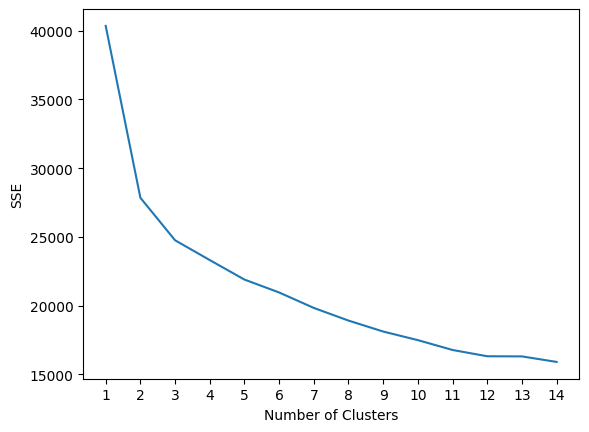

In [ ]:
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Here, the elbow is located at x=3.

Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically.

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")
kl.elbow

3

### 8.2 Check the silhouette_score for K = 2,3,4,and 5

The silhouette coefficient quantifies how well a data point fits into its assigned cluster based on two factors:

1. How close the data point is to other points in the cluster
2. How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

Now, we will Loop through values of k again. This time, instead of computing SSE, we compute the silhouette coefficient.

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(3, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_a)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)
print(silhouette_coefficients)

[0.20368679960412825, 0.15251518070503023, 0.14120660729316406, 0.16092475319465321]


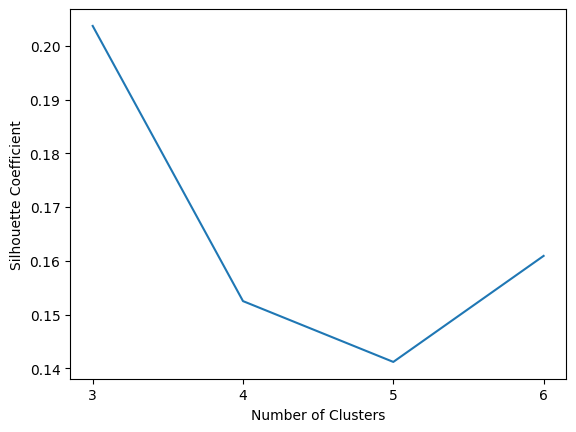

In [ ]:
#Plotting the average silhouette scores for each k.

plt.plot(range(3, 7), silhouette_coefficients)
plt.xticks(range(3, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

This shows that the best choice for k is 3 since it has the maximum score.

Further Study:

Which method is better: Silhouette Method or Elbow Method to find Optimal Clusters?

https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891

### 8.3 Report the optimal K value and fit the data clustering model using it.

<Axes: title={'center': 'KMeans Result'}, xlabel='x1', ylabel='x2'>

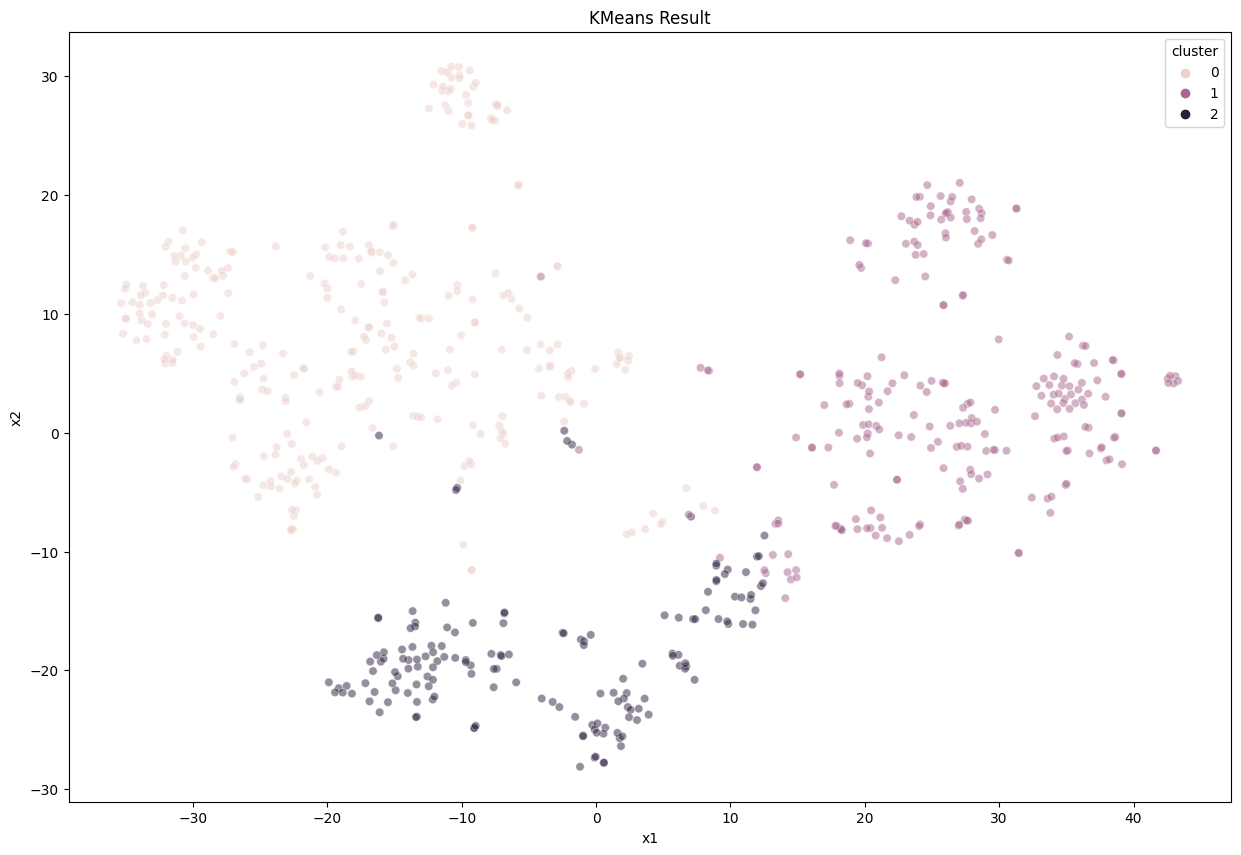

In [ ]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300 )
kmeans.fit(df)
labels = kmeans.labels_
df_orig['Cluster'] = list(pd.Series(labels))
df_orig.head()
from sklearn.manifold import TSNE  #to visualize high-dimensional data
X = df.copy()
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = kmeans.labels_
dftsne.columns = ['x1','x2','cluster']
plt.figure(figsize=(15,10))
plt.title('KMeans Result')
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5)

### 8.4 add cluster label to the final dataset (before scaling) for cluster profliling

In [ ]:
df_orig['Cluster'] = list(pd.Series(labels))
df_orig.head()

,name,Unnamed: 0,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water,Cluster
0,"Lamb, raw, ground",7,100.000,282.000,23.000,10.000,73.000,59.000,69.300,18.000,...,10.190,9.600,1.850,73.000,0.000,0.870,0.000,0.000,59.470,1
1,"Cheese, camembert",8,100.000,300.000,24.000,15.000,72.000,842.000,15.400,62.000,...,15.259,7.023,0.724,72.000,0.000,3.680,0.000,0.000,51.800,1
2,"Oil, soybean lecithin",67,100.000,763.000,30.000,15.000,0.000,0.000,0.200,0.000,...,15.005,10.977,2.292,0.000,0.000,0.000,0.000,0.000,0.000,2
3,"Cream, cultured, sour",81,100.000,198.000,19.000,10.000,59.000,31.000,19.200,6.000,...,10.140,4.594,0.800,59.000,0.000,0.510,0.000,0.000,73.070,0
4,"Cheese, port de salut",84,100.000,352.000,28.000,17.000,123.000,534.000,15.400,18.000,...,16.691,9.338,0.729,123.000,0.000,2.000,0.000,0.000,45.450,1


In [ ]:
df_orig.to_excel('/content/nutrition.xlsx', index=False)

## Step 9: Conclusion

1. We imported data using Pandas module. Next, we clean the data by imputing missing values.

2. As, this data is measured in different units, we standerdise the dataset before buliding the Clustering model.

3. Next we run the clustering algortihm for different values of k and found that k=5 is the optimal value using the elblow method. After checking the silhouette_score, we found that k=3 is the optimal value.

4. We prefer the silhouette_score for choosing the optimal vlaue of k as the silhouette value measures how similar an object is to its own cluster compared to other clusters.

5. We pickle the best model, so that we can simple load that model for future data.